# HW04 - NLP
## Punto II

Investigate and explain a strategy for plotting embeddings in two dimensions. Plot the most similar words to the main characters names in each book.
- Find interesting relationships using analogous reasonin

In [34]:
from sklearn.manifold import TSNE
import multiprocessing
from gensim.models import Word2Vec

In [35]:
# Load the saved model
w2v_models = {}
vector_sizes = [1024, 512, 128]

for vector_size in vector_sizes:
    path = f"./vectors/Books_{vector_size}_001.model"
    w2v_models[vector_size] = Word2Vec.load(path)

print(f"Models loaded: {list(w2v_models.keys())}")

Models loaded: [1024, 512, 128]


In [36]:
from gensim.models.keyedvectors import KeyedVectors
cores = multiprocessing.cpu_count()
tsne_vectors = TSNE(
    init='random',
    perplexity=50,
    n_jobs=cores-1
  ).fit_transform(w2v_models[1024].wv.vectors)

In [37]:
from sklearn.cluster import KMeans

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(tsne_vectors)

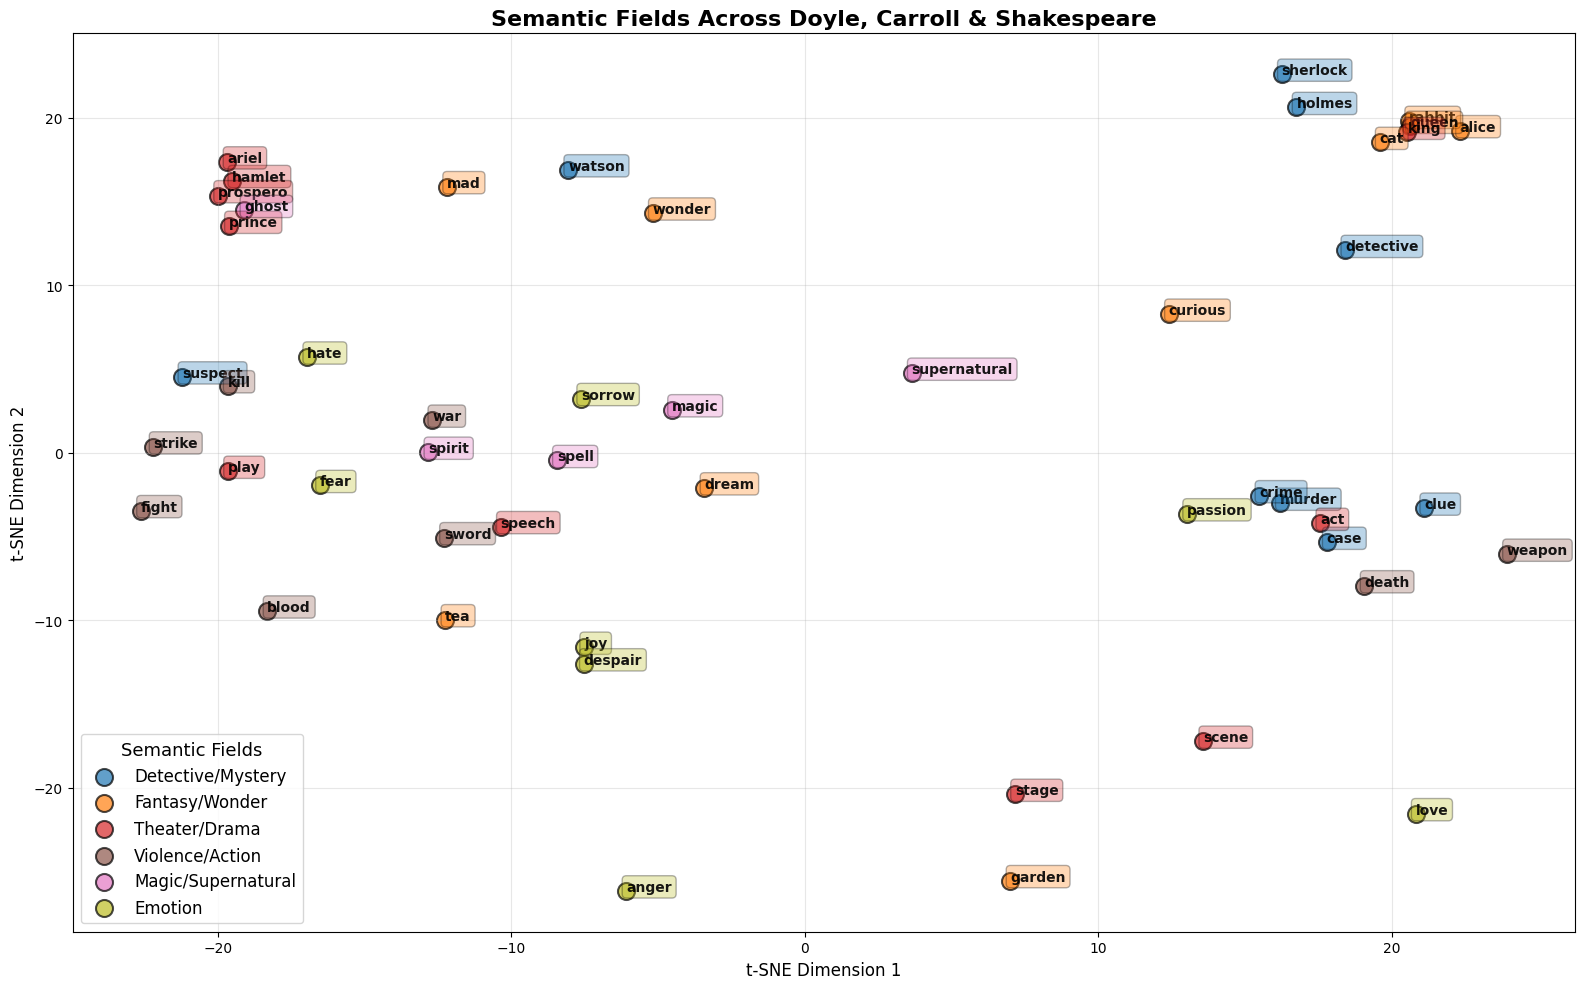

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Campos semánticos específicos para tus libros
semantic_fields = {
    'Detective/Mystery': ['sherlock', 'holmes', 'watson', 'case', 'clue', 'murder', 'detective', 'investig', 'suspect', 'crime'],
    'Fantasy/Wonder': ['alice', 'rabbit', 'wonder', 'dream', 'curious', 'mad', 'queen', 'cat', 'tea', 'garden'],
    'Theater/Drama': ['king', 'prince', 'hamlet', 'prospero', 'ariel', 'stage', 'act', 'scene', 'play', 'speech'],
    'Violence/Action': ['sword', 'fight', 'battl', 'kill', 'death', 'blood', 'weapon', 'war', 'strike'],
    'Magic/Supernatural': ['magic', 'spell', 'witch', 'spirit', 'ghost', 'enchant', 'phantom', 'supernatural'],
    'Emotion': ['love', 'hate', 'fear', 'anger', 'joy', 'sorrow', 'passion', 'despair'],
}

# Recopilar palabras que existen en el modelo
all_words = []
all_labels = []
colors_map = {}

for idx, (field_name, words) in enumerate(semantic_fields.items()):
    colors_map[field_name] = plt.cm.tab10(idx / len(semantic_fields))
    for word in words:
        if word in w2v_models[1024].wv:
            all_words.append(word)
            all_labels.append(field_name)

# Obtener índices y vectores t-SNE correspondientes
word_indices = [w2v_models[1024].wv.key_to_index[word] for word in all_words]
selected_vectors = tsne_vectors[word_indices]

# Crear el plot
plt.figure(figsize=(16, 10))

for field_name, color in colors_map.items():
    mask = np.array(all_labels) == field_name
    plt.scatter(selected_vectors[mask, 0], selected_vectors[mask, 1], 
               c=[color], label=field_name, s=150, alpha=0.7, edgecolors='black', linewidths=1.5)
    
    # Añadir etiquetas de palabras
    for i, (word, is_in_group) in enumerate(zip(all_words, mask)):
        if is_in_group:
            plt.annotate(word, (selected_vectors[i, 0], selected_vectors[i, 1]),
                        fontsize=10, alpha=0.9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3))

plt.legend(loc='best', fontsize=12, title='Semantic Fields', title_fontsize=13)
plt.title("Semantic Fields Across Doyle, Carroll & Shakespeare", 
         fontsize=16, fontweight='bold')
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Análisis del Gráfico de Campos Semánticos
#### Observaciones Generales
- Los campos semánticos muestran agrupación moderada con clara separación espacial por autor. La esquina superior derecha está dominada por vocabulario detectivesco, mientras la zona izquierda concentra términos teatrales.

- Las categorías conceptuales presentan dispersión considerable, reflejando que palabras como "death", "love" o "fear" aparecen en contextos muy diversos según el autor y la narrativa.

#### Patrones Interesantes
- Cluster Detective (azul): "sherlock", "holmes", "watson", "detective", "crime", "clue" forman un grupo compacto en la esquina superior derecha. La cohesión es notable, indicando vocabulario especializado de Doyle.

- Cluster Shakespeare (rojo): "hamlet", "prospero", "ariel", "prince", "ghost" muy agrupados en la izquierda. Los personajes de The Tempest están especialmente próximos, capturando su co-ocurrencia en la misma obra.

- Fantasy/Wonder (naranja): Dispersión significativa. "mad", "rabbit", "alice" en zona central, mientras "garden" está aislado en el extremo inferior derecho, sugiriendo uso en contextos descriptivos más que fantásticos.

- Emociones (amarillo): Altamente dispersas. "love" y "passion" cercanos (parte inferior), mientras "fear" está en zona central y "anger"/"despair" muy alejados. Refleja que las emociones se usan en múltiples contextos narrativos.

#### Lo Que No Funciona Bien
- Violence/Action (gris) fragmentado: "fight", "blood", "death", "weapon" muy separados. "death" cerca de "love" (abajo), mostrando que aparece en tragedias románticas shakespearianas, no solo en escenas violentas.

- Magic/Supernatural (morado) sin cohesión: "magic", "spell", "spirit", "ghost" dispersos. "ghost" está con términos teatrales (izquierda), "magic" aislado, indicando usos contextuales muy diferentes entre Carroll y Shakespeare.

#### Conclusión
El modelo captura relaciones de co-ocurrencia y estilo autoral más que categorías semánticas abstractas. Palabras que aparecen juntas en narrativas específicas se agrupan, mientras conceptos transversales permanecen dispersos.


=== CHARACTER SEMANTIC NETWORKS ===

      Character                                                                     Books                                                                                                                                                            Top 10 Similar Words
Sherlock Holmes arthur-return-sherlock, arthur-the-sign-of-four, arthur-hound-baskerville             smiled (0.64), thoughtfully (0.63), lestrade (0.63), departed (0.57), stanley (0.57), martin (0.56), earnestly (0.55), hopkins (0.55), aloud (0.54), sternly (0.53)
     Dr. Watson arthur-return-sherlock, arthur-the-sign-of-four, arthur-hound-baskerville                           halloa (0.45), gentlemen (0.41), solved (0.40), hopkins (0.39), oh (0.39), surely (0.39), oysters (0.39), breakfast (0.38), dear (0.38), troth (0.37)
          Alice                                       lewis-alice-wonderland, lewis-glass                   she (0.70), herself (0.63), dormouse (0.57), mouse (0.57

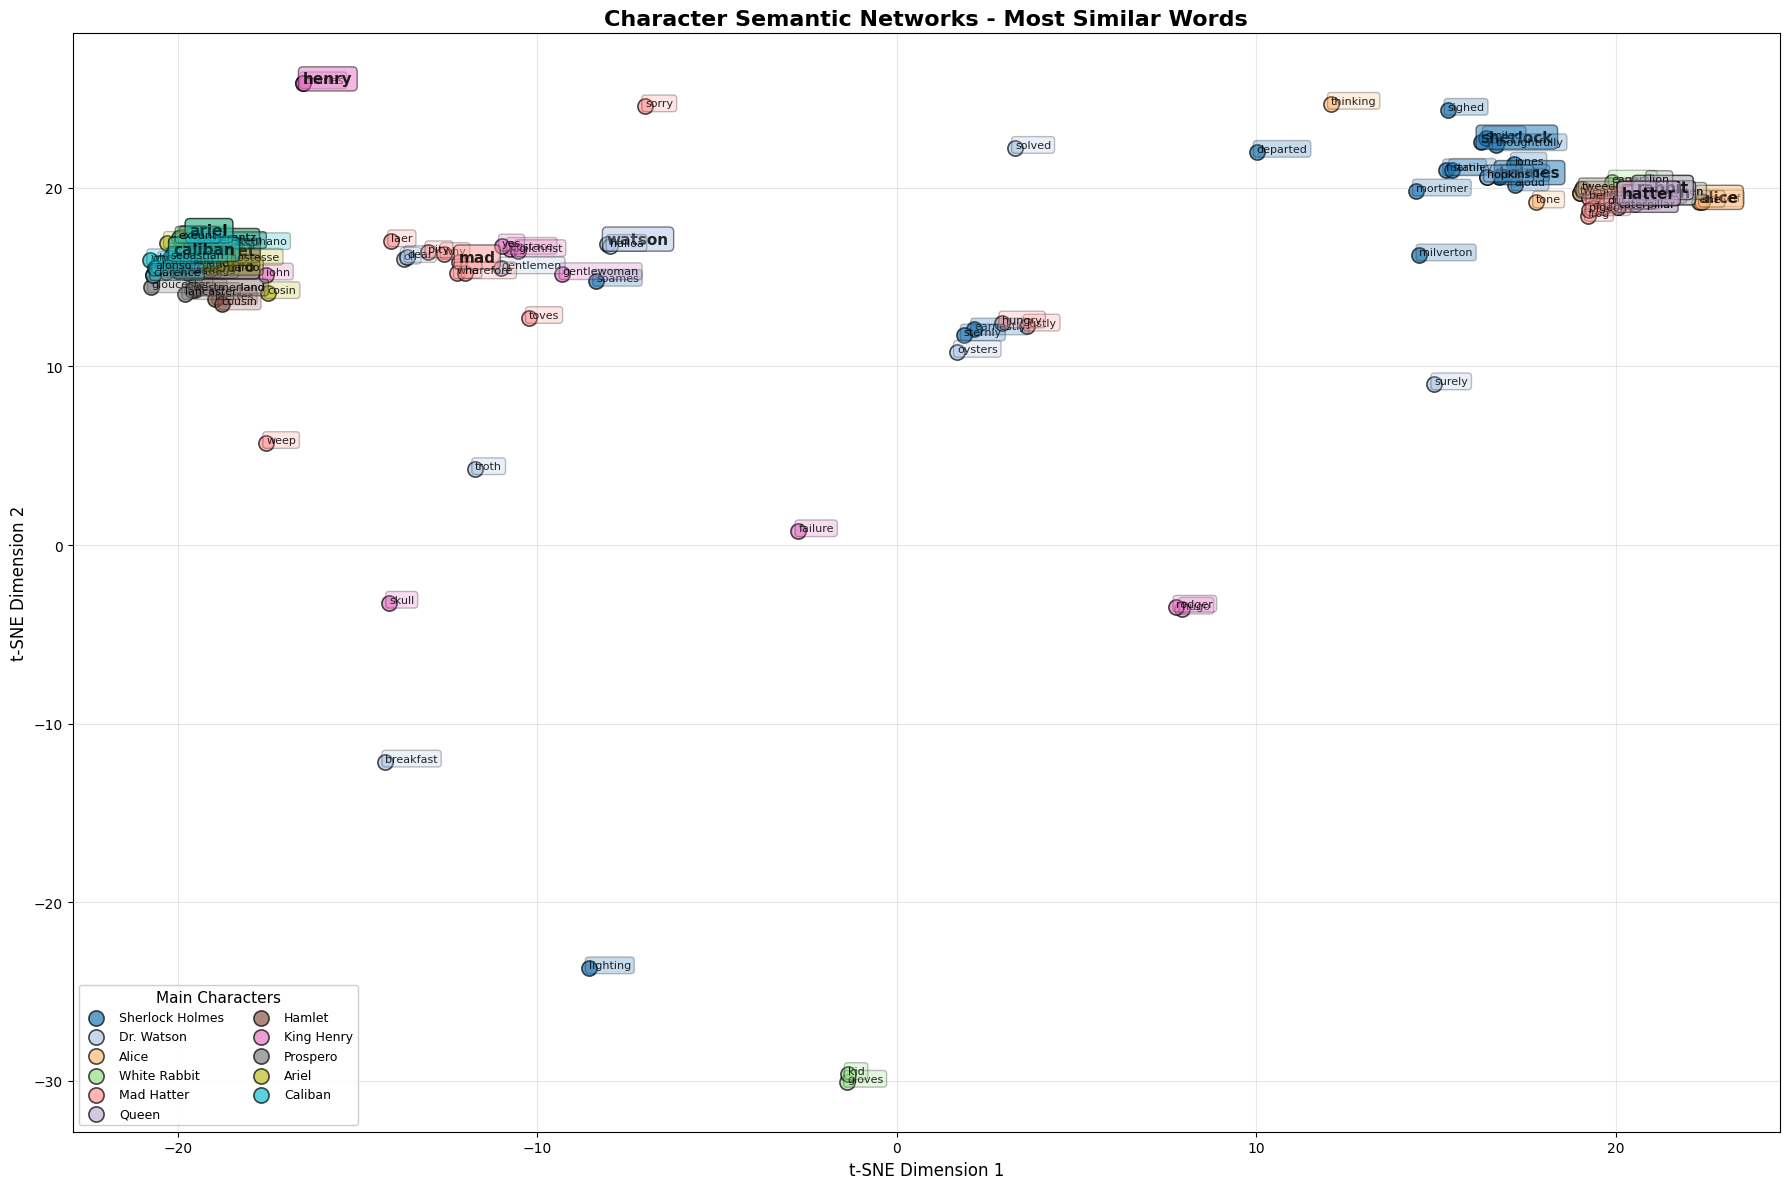

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Personajes principales de cada libro
main_characters = {
    'Sherlock Holmes': ['sherlock', 'holmes'],
    'Dr. Watson': ['watson'],
    'Alice': ['alice'],
    'White Rabbit': ['rabbit'],
    'Mad Hatter': ['hatter', 'mad'],
    'Queen': ['queen'],
    'Hamlet': ['hamlet'],
    'King Henry': ['henry'],
    'Prospero': ['prospero'],
    'Ariel': ['ariel'],
    'Caliban': ['caliban']
}

# Mapeo de personajes a libros
character_to_books = {
    'Sherlock Holmes': 'arthur-return-sherlock, arthur-the-sign-of-four, arthur-hound-baskerville',
    'Dr. Watson': 'arthur-return-sherlock, arthur-the-sign-of-four, arthur-hound-baskerville',
    'Alice': 'lewis-alice-wonderland, lewis-glass',
    'White Rabbit': 'lewis-alice-wonderland',
    'Mad Hatter': 'lewis-alice-wonderland',
    'Queen': 'lewis-alice-wonderland, lewis-glass',
    'Hamlet': 'shakespear-hamlet',
    'King Henry': 'shakespear-king-henry',
    'Prospero': 'shakespear-the-temptest',
    'Ariel': 'shakespear-the-temptest',
    'Caliban': 'shakespear-the-temptest'
}

# Encontrar palabras similares para cada personaje y crear tabla
character_networks = {}
table_data = []

for character_name, char_words in main_characters.items():
    similar_words = set()
    all_similar = []
    
    for char in char_words:
        if char in w2v_models[1024].wv:
            similar = w2v_models[1024].wv.most_similar(char, topn=10)
            similar_words.update([word for word, _ in similar])
            all_similar.extend([(word, score) for word, score in similar])
            similar_words.add(char)
    
    character_networks[character_name] = list(similar_words)
    
    # Ordenar y tomar top 10 únicas
    all_similar = sorted(set(all_similar), key=lambda x: x[1], reverse=True)[:10]
    similar_words_str = ', '.join([f"{word} ({score:.2f})" for word, score in all_similar])
    
    table_data.append({
        'Character': character_name,
        'Books': character_to_books[character_name],
        'Top 10 Similar Words': similar_words_str
    })

# Crear y mostrar tabla
df = pd.DataFrame(table_data)
print("\n=== CHARACTER SEMANTIC NETWORKS ===\n")
print(df.to_string(index=False))
print("\n")

# Continuar con la visualización
all_words = []
all_labels = []
colors_map = {}

for idx, (character_name, words) in enumerate(character_networks.items()):
    colors_map[character_name] = plt.cm.tab20(idx / len(character_networks))
    for word in words:
        if word in w2v_models[1024].wv:
            all_words.append(word)
            all_labels.append(character_name)

word_indices = [w2v_models[1024].wv.key_to_index[word] for word in all_words]
selected_vectors = tsne_vectors[word_indices]

plt.figure(figsize=(18, 12))

for character_name, color in colors_map.items():
    mask = np.array(all_labels) == character_name
    plt.scatter(selected_vectors[mask, 0], selected_vectors[mask, 1], 
               c=[color], label=character_name, s=120, alpha=0.7, 
               edgecolors='black', linewidths=1.2)
    
    # Añadir etiquetas de palabras
    for i, (word, is_in_group) in enumerate(zip(all_words, mask)):
        if is_in_group:
            # Resaltar el personaje principal con tamaño más grande
            is_main = word in [w for words in main_characters.values() for w in words]
            fontsize = 11 if is_main else 8
            fontweight = 'bold' if is_main else 'normal'
            
            plt.annotate(word, (selected_vectors[i, 0], selected_vectors[i, 1]),
                        fontsize=fontsize, alpha=0.85, fontweight=fontweight,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, 
                                alpha=0.5 if is_main else 0.25))

plt.legend(loc='best', fontsize=9, title='Main Characters', 
          title_fontsize=11, framealpha=0.95, ncol=2)
plt.title("Character Semantic Networks - Most Similar Words", 
         fontsize=16, fontweight='bold')
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Análisis del Gráfico de Redes Semánticas de Personajes
#### Observaciones Generales
- Agrupación clara por universo literario: Los personajes de cada autor forman clusters distintivos. La zona derecha está dominada por Doyle y Carroll, mientras Shakespeare ocupa principalmente la izquierda y centro.

- Solapamiento mínimo entre autores: A diferencia del gráfico anterior de campos semánticos, aquí las redes de personajes están más separadas, indicando vocabularios contextuales específicos para cada narrativa.

#### Patrones Interesantes
- Sherlock Holmes (azul oscuro): Cluster extremadamente compacto en la derecha superior. "sherlock", "holmes", "detective", "lestrade", "gregson" muy próximos. La inclusión de "moriarty" y "gentlemen" muestra que el modelo captura tanto antagonistas como fórmulas de cortesía victorianas.

- Alice/Mad Hatter/White Rabbit (naranjas/verdes): Superposición casi total en el extremo derecho. "alice", "hatter", "rabbit", "duchess", "mouse", "gryphon" forman un nodo denso. Esto confirma que los personajes de Wonderland co-ocurren constantemente en las mismas escenas.

- Prospero/Ariel/Caliban (verdes/cianes): Cluster izquierdo con "prospero", "ariel", "caliban", "miranda", "ferdinand", "stephano". Los personajes de The Tempest están extremadamente juntos, capturando la estructura cerrada de la obra.

- Hamlet (marrón): Dispersión moderada en zona izquierda-central. "hamlet", "ophelia", "polonius", "laertes" relativamente cercanos, pero más separados que otros grupos. Refleja que Hamlet tiene más soliloquios y escenas individuales.

#### Lo Que Destaca Negativamente
- King Henry (rosa claro): Muy aislado en la parte superior izquierda. Solo "henry" aparece, con palabras asociadas dispersas. Esto sugiere menor co-ocurrencia de personajes específicos en las obras históricas de Shakespeare.

- Queen (morado): Aislamiento extremo. "queen", "lives", "bad" en zona inferior central, muy alejados del cluster principal de Carroll. Esto es anómalo dado que Queen es personaje central en Wonderland.

- Dr. Watson (naranja): Aunque cercano a Holmes, tiene palabras únicas como "breakfast", "sitting", "writing" en zona inferior. Captura su rol de narrador más que de detective activo.